In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center>
    <h1><font color=darkred>Machine learning in action </font></h1>
    <h1><font color=darkred> Ensemble </font></h1>
    <h3>Le Hai Phu</h3>
    <h4>Student name:    </h4>
    <hr>
    <h1>Exercise 10: Predict flight prices </h1>
    <h3> 2024</h3>
</center

# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
%matplotlib inline

# Read the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/ML review/Class 10 - Ensemble-20241213T134642Z-001/Class 10 - Ensemble/Datasets/Flight_prices.csv')

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 12)

# Drop 3 columns: 'Unnamed: 0', 'flight', 'duration'

In [6]:
df = df.drop(['Unnamed: 0', 'flight', 'duration'], axis = 1)

# Group by airline, find average prices (sorted) => encoding

<Axes: xlabel='airline'>

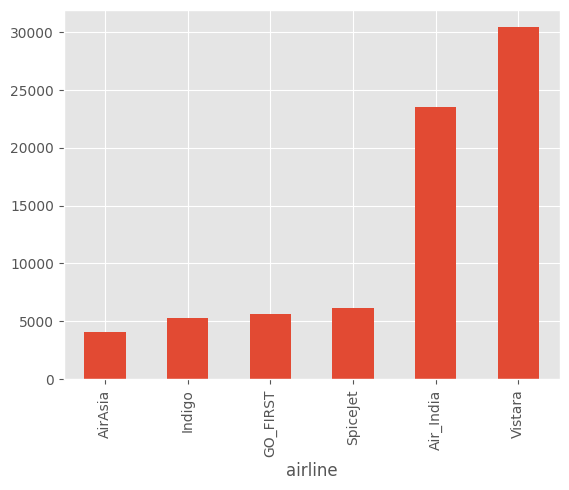

In [7]:
df.groupby('airline')['price'].mean().sort_values().plot(kind = 'bar')

In [8]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

<Axes: xlabel='airline'>

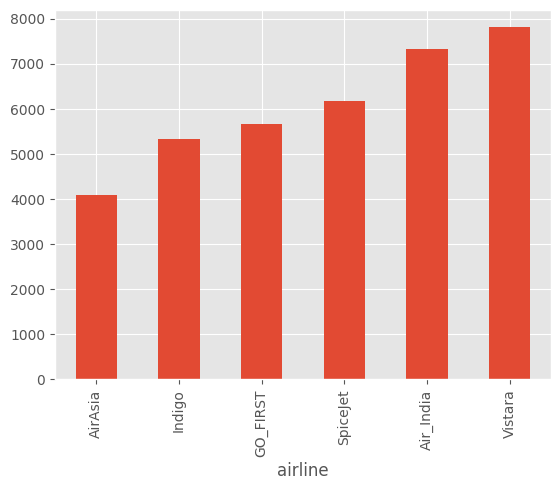

In [9]:
df[df['class'] == 'Economy'].groupby('airline')['price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='airline'>

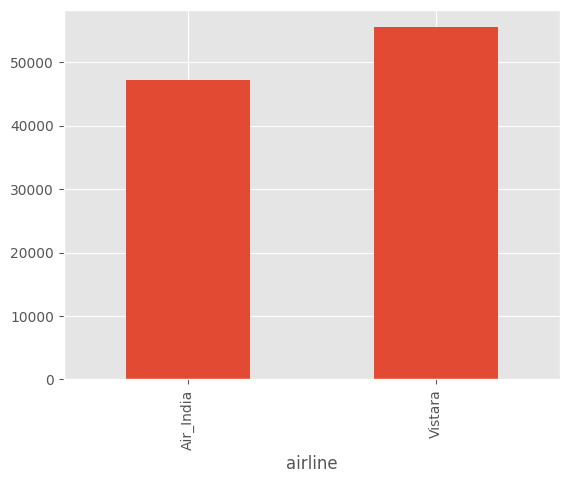

In [10]:
df[df['class'] == 'Business'].groupby('airline')['price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='source_city'>

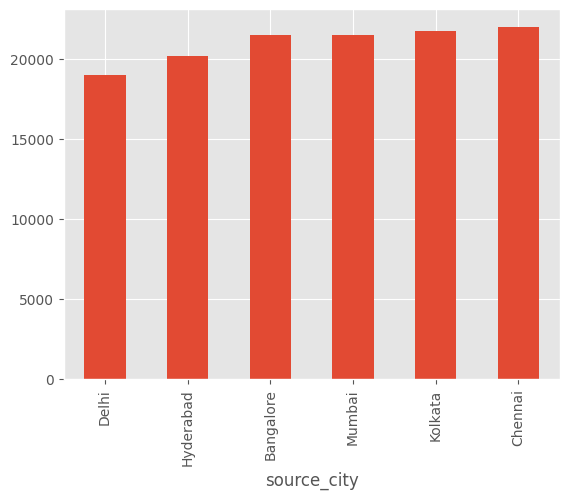

In [11]:
df.groupby('source_city')['price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='destination_city'>

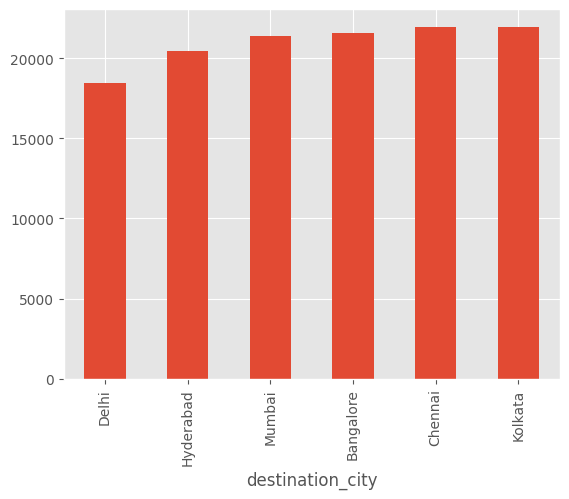

In [12]:
df.groupby('destination_city')['price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='departure_time'>

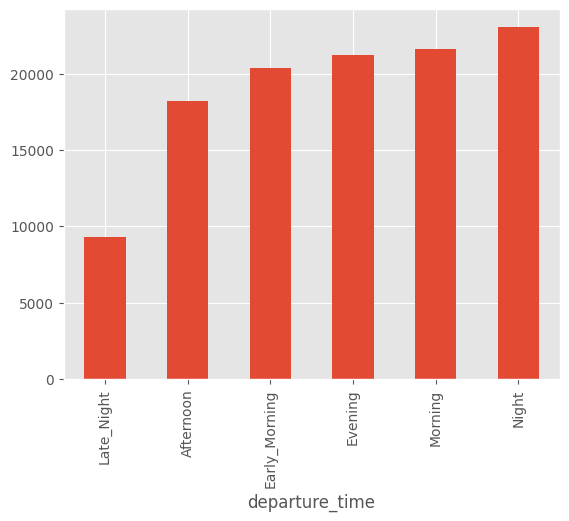

In [13]:
df.groupby('departure_time')['price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='stops'>

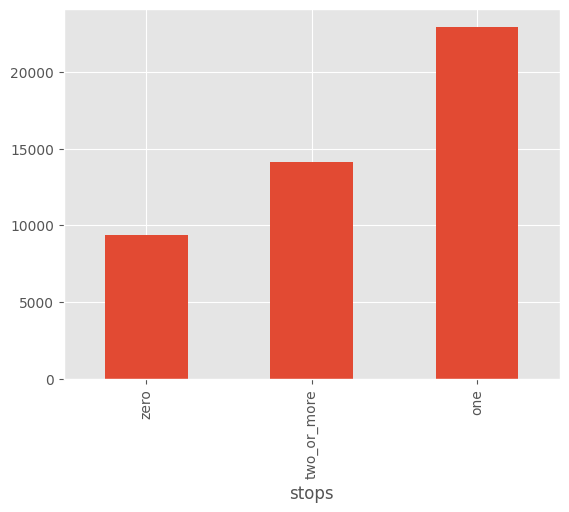

In [14]:
df.groupby('stops')['price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='arrival_time'>

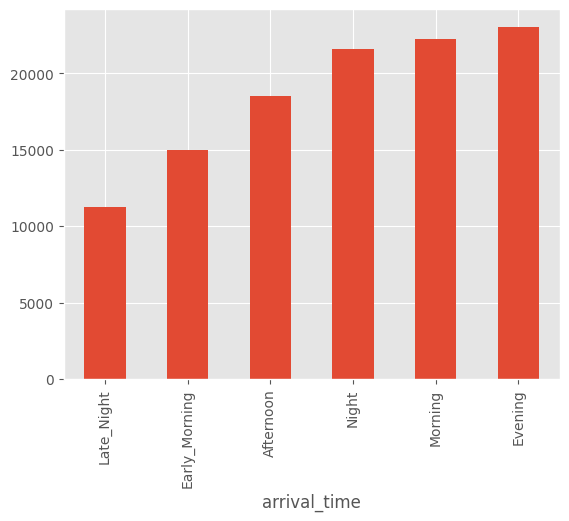

In [15]:
df.groupby('arrival_time')['price'].mean().sort_values().plot(kind = 'bar')

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding airline: {'AirAsia': 0, 'Indigo': 1, 'GO_FIRST': 2, 'SpiceJet': 3, 'Air_India': 4, 'Vistara': 5}

In [17]:
categorical_columns = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [19]:
for i in categorical_columns:
    print(df[i].unique())

[4 0 5 2 3 1]
[2 5 0 4 3 1]
[2 1 4 0 5 3]
[2 0 1]
[5 4 1 0 2 3]
[5 0 4 3 1 2]
[1 0]


# Encoding source_city: {'Delhi': 0, 'Hyderabad': 1, 'Bangalore': 2, 'Mumbai': 3, 'Kolkata': 4, 'Chennai': 5}

In [20]:
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,4,2,2,2,5,5,1,1,5953
1,4,2,1,2,4,5,1,1,5953
2,0,2,1,2,1,5,1,1,5956
3,5,2,4,2,0,5,1,1,5955
4,5,2,4,2,4,5,1,1,5955


# Encoding destination_city: {'Delhi': 0, 'Hyderabad': 1, 'Mumbai': 2, 'Bangalore': 3, 'Chennai': 4, 'Kolkata': 5}

In [21]:
df.tail(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
300148,5,1,4,0,2,3,0,49,69265
300149,5,1,0,0,5,3,0,49,77105
300150,5,1,1,0,5,3,0,49,79099
300151,5,1,1,0,2,3,0,49,81585
300152,5,1,4,0,2,3,0,49,81585


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   airline           300153 non-null  int64
 1   source_city       300153 non-null  int64
 2   departure_time    300153 non-null  int64
 3   stops             300153 non-null  int64
 4   arrival_time      300153 non-null  int64
 5   destination_city  300153 non-null  int64
 6   class             300153 non-null  int64
 7   days_left         300153 non-null  int64
 8   price             300153 non-null  int64
dtypes: int64(9)
memory usage: 20.6 MB


# Encoding departure_time: {'Early_Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late_Night': 5}

In [23]:
df.isnull().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
days_left,0
price,0


# Encoding departure_time: {'Early_Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late_Night': 5}

# Encoding stops: {'zero': 0, 'one':1 , 'two_or_more': 2}

# Encoding class: {'Economy': 0, 'Business': 1}

 # Split X and y (price)

In [24]:
X = df.drop(columns=['price'])
y = df['price']

In [25]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Train test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240122, 8)
X_test shape: (60031, 8)
y_train shape: (240122,)
y_test shape: (60031,)


# Develop different regression models and report r2_scores and mean_absolute_error

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# models = {
#     'Linear Regression': LinearRegression(),
#     'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
#     'LightGBM': LGBMRegressor(),
#     'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
# }
# # Clean column names
# X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
# X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
# # Train and Evaluate Models
# results = {}

# for model_name, model in models.items():
#     print(f"Training {model_name}...")
#     model.fit(X_train, y_train)  # Train the model
#     y_pred = model.predict(X_test)  # Make predictions

#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     results[model_name] = {'MSE': mse, 'R2 Score': r2}
#     print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}\n")

# # Display results
# results_df = pd.DataFrame(results).T
# print("Model Performance Comparison:")
# print(results_df)

Training Linear Regression...
Linear Regression - MSE: 49178033.03, R2: 0.90

Training Random Forest...
Random Forest - MSE: 4571152.26, R2: 0.99

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 11
[LightGBM] [Info] Start training from score 20888.572417
LightGBM - MSE: 11198282.82, R2: 0.98

Training XGBoost...
XGBoost - MSE: 8215154.32, R2: 0.98

Model Performance Comparison:
                            MSE  R2 Score
Linear Regression  4.917803e+07  0.904598
Random Forest      4.571152e+06  0.991132
LightGBM           1.119828e+07  0.978276
XGBoost            8.215154e+06  0.984063


# Linear regression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
 y_pred = lr.predict(X_test)

In [30]:
r2_linear = r2_score(y_test, y_pred)
mean_absolute_error_linear = mean_absolute_error(y_test, y_pred)

In [31]:
r2_linear

0.9039113488350009

In [32]:
mean_absolute_error_linear

4667.2836983596535

# Random forest

In [33]:
rfreg = RandomForestRegressor(random_state=0)
rfreg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [34]:
y_pred_rf = rfreg.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [37]:
print("Model Accuracy Score with 10 Decision Tree: {0:0.4f}". format(r2_score(y_test, y_pred_rf)))

Model Accuracy Score with 10 Decision Tree: 0.9617


In [40]:
r2_rf = r2_score(y_test, y_pred_rf)
mean_absolute_error_rf = mean_absolute_error(y_test, y_pred_rf)

In [41]:
print(mean_absolute_error_rf)

2178.5608564770237


# Light GBM

In [42]:
import lightgbm as lgb

In [43]:
lgb_reg = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=42)

In [44]:
lgb_reg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 8
[LightGBM] [Info] Start training from score 20888.572417


LGBMRegressor(learning_rate=0.09, max_depth=-5, random_state=42)

In [45]:
y_pred_lgb = lgb_reg.predict(X_test)

In [47]:
print(r2_score(y_pred_lgb, y_test))

0.9622431645803684


In [48]:
r2_lgb = r2_score(y_test, y_pred_lgb)
mean_absolute_error_lgb = mean_absolute_error(y_test, y_pred_lgb)

# XGB

In [49]:
import xgboost as xgb

In [50]:
xgb_reg = xgb.XGBRegressor(max_depth = 10, learning_rate = 0.9784566339521307, n_estimators =620,
    min_child_weight = 4, gamma = 0.11977126511765261, subsample = 0.6576714959928751, colsample_bytree = 0.6462972842517933,
    reg_alpha = 0.025644262886461783, reg_lambda =0.33866890066789906, random_state = 863)

In [51]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6462972842517933, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.11977126511765261,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9784566339521307,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=620, n_jobs=None,
             num_parallel_tree=None, random_state=863, ...)

In [52]:
y_pred_xgb = xgb_reg.predict(X_test)

In [53]:
print(r2_score(y_pred_xgb, y_test))

0.9565535187721252


In [54]:
r2_xgb = r2_score(y_test, y_pred_xgb)
mean_absolute_error_xgb = mean_absolute_error(y_test, y_pred_xgb)

Create a dataframe

models = pd.DataFrame({
    
    'Model':['Linear Regreesion','Random forest', 'Light GBM', 'XGBoost'],

    'R2':[r2_linear, r2_rf, r2_light, r2_xgb],

    'MAE':[mean_absolute_error_linear, mean_absolute_error_rf,
    
    mean_absolute_error_light, mean_absolute_error_xgb]})

In [56]:
models = pd.DataFrame({'Model':['Linear Regreesion','Random forest', 'Light GBM', 'XGBoost'],

    'R2':[r2_linear, r2_rf, r2_lgb, r2_xgb],

    'MAE':[mean_absolute_error_linear, mean_absolute_error_rf,

    mean_absolute_error_lgb, mean_absolute_error_xgb]})

In [57]:
models

,Model,R2,MAE
0,Linear Regreesion,0.903911,4667.283698
1,Random forest,0.961679,2178.560856
2,Light GBM,0.963999,2505.608448
3,XGBoost,0.957086,2924.301599
